# Uncertainty Quantification (UQ)

Approach:

1. Select some parameters to vary (e.g., the mean speed of pedestrians).
2. Use different distributions to estimate selected parameters.
3. Test effect on a so called quantity of intereset (e.g., the density).

That is, you feed different input distributions, simulate and check output. Create a figure of this idea by producing multiple input distributions represented as histograms. Then, use Inkscape or LibreOffice Draw to combine the three steps here:

```
+------------+      +------------+      +------------+
| Different  |      |            |      | Distribut- |
| input      |      |            |      | ion of     |
| distribut- | ---> | Vadere     | ---> | quantity   |
| ions / hi- |      |            |      | of         |
| stograms   |      |            |      | interest   |
+------------+      +------------+      +------------+
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def use_custom_plot_settings(font_weight="normal"):
    font_size_extra_small = 12
    font_size_small = 16
    font_size_medium = 18
    font_size_big = 20

    plt.style.use("default")
    
    plt.rc("font", size=font_size_small, weight=font_weight)
    plt.rc("axes", titlesize=font_size_big, titleweight=font_weight)
    plt.rc("axes", labelsize=font_size_medium, labelweight=font_weight)
    plt.rc("xtick", labelsize=font_size_small)
    plt.rc("ytick", labelsize=font_size_small)
    plt.rc("legend", fontsize=font_size_extra_small)
    plt.rc("figure", titlesize=font_size_big, titleweight=font_weight)

def use_default_plot_settings():
    plt.rcdefaults()
    
use_custom_plot_settings(font_weight="normal")
print(plt.style.available)
sns.set_style(style="white")

['seaborn-poster', 'seaborn-dark', 'seaborn-colorblind', 'seaborn-notebook', 'seaborn-darkgrid', 'Solarize_Light2', 'grayscale', '_classic_test', 'bmh', 'seaborn-deep', 'tableau-colorblind10', 'fast', 'seaborn', 'seaborn-pastel', 'seaborn-muted', 'seaborn-ticks', 'dark_background', 'seaborn-bright', 'classic', 'seaborn-talk', 'seaborn-white', 'ggplot', 'seaborn-paper', 'seaborn-dark-palette', 'seaborn-whitegrid', 'fivethirtyeight']


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


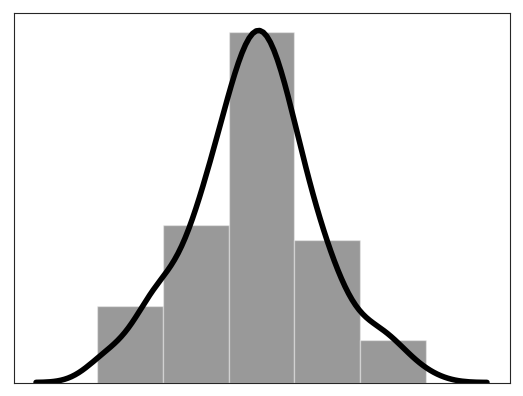

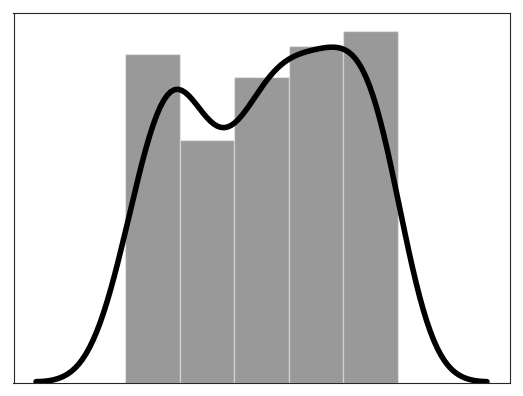

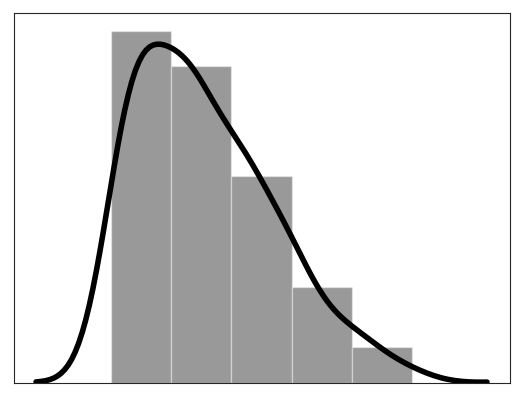

In [3]:
input_distributions = [
    (np.random.normal, {}),
    (np.random.uniform, {"low": -3, "high": 3}),
    (np.random.triangular, {"left": 0, "mode": 0, "right": 3}),
]

sample_size = 200
for i, distribution in enumerate(input_distributions):
    plt.figure(i)
    
    f = distribution[0]
    params = distribution[1]
    x = f(**params, size=sample_size)
    
    color="black" # color="C" + str(i)
    kde_kws={"lw": 4}
    ax = sns.distplot(x, bins=5, color=color, kde_kws=kde_kws, label=f.__name__)

    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    fig = ax.get_figure()
    filename = "Input-Distribution-{}.pdf".format(f.__name__.capitalize())
    fig.savefig(filename, bbox_inches="tight")
    
plt.show()

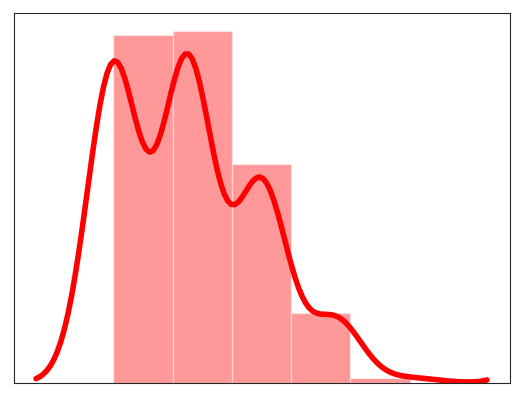

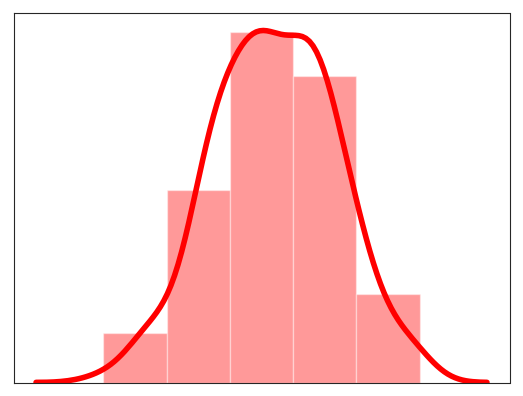

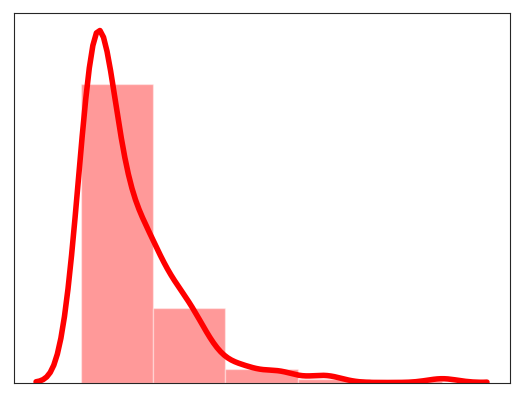

In [4]:
output_distribution = [
    (np.random.poisson, {"lam": 1}),
    (np.random.normal, {}),
    (np.random.exponential, {}),
]

sample_size = 200
for i, distribution in enumerate(output_distribution):
    plt.figure(i)
    
    f = distribution[0]
    params = distribution[1]
    x = f(**params, size=sample_size)
    
    color="red" # color="C" + str(i)
    kde_kws={"lw": 4}
    ax = sns.distplot(x, bins=5, color=color, kde_kws=kde_kws, label=f.__name__)

    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    fig = ax.get_figure()
    filename = "Output-Distribution-{}.pdf".format(f.__name__.capitalize())
    fig.savefig(filename, bbox_inches="tight")
    
plt.show()